**1. Подберите скорость обучения (eta) и количество итераций**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [5]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [8]:
X = np.array([[ 1,  1],
              [ 1,  1],
              [ 1,  2],
              [ 1,  5],
              [ 1,  3],
              [ 1,  0],
              [ 1,  5],
              [ 1, 10],
              [ 1,  1],
              [ 1,  2]])
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [19]:
n = X.shape[0]

eta = 0.1 # Изменено. Было 1e-2
n_iter = 120 # Изменено. Было 100

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    for k in range(W.shape[0]):
        W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
    if i % 10 == 0:
        eta /= 1.1
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err, 2)}')

Number of objects = 10        
Learning rate = 0.1        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [11.8 38.2], MSE = 3047.75
Iteration #10: W_new = [12651.73553914 69617.0969639 ], MSE = 18310954068.05
Iteration #20: W_new = [ 7732434.81888021 42641607.37852182], MSE = 9128819654907552.0
Iteration #30: W_new = [1.06344502e+09 5.86454589e+09], MSE = 2.327920364266843e+20
Iteration #40: W_new = [3.00127077e+10 1.65510116e+11], MSE = 2.545133529815938e+23
Iteration #50: W_new = [1.55345341e+11 8.56677968e+11], MSE = 9.572295620500076e+24
Iteration #60: W_new = [1.27742291e+11 7.04456313e+11], MSE = 9.351480126475979e+24
Iteration #70: W_new = [1.38141953e+10 7.61806995e+10], MSE = 1.6408589528283872e+23
Iteration #80: W_new = [1.51674189e+08 8.36432543e+08], MSE = 3.125533537874452e+19
Iteration #90: W_new = [116395.49984147 641638.79865015], MSE = 31317286806394.18
Iteration #100: W_new = [48.41963663 22.99884414], MSE = 53518.86
Iteration #110: W_new = [44.97714033  3.82798

*При показателях eta = 1e-2 и n_iter = 1155  среднеквадратичная ошибка составила MSE = 175.58 и далее уже не изменялась. 
Но лучше всего оказались следующие параметры: $eta = 0.1$ и $n-iter = 120$ результат показал самую наименьшую ошибку $MSE = 43.97$ далее при увеличении колличества итераций значение ошибки оставалось прежним.*

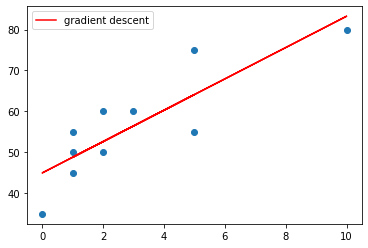

In [20]:
y_pred_grad2 = X @ W
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred_grad2, label='gradient descent', c='r')
plt.legend()
plt.show()

**2*. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее**

In [28]:
n = X.shape[0]

eta = 1e-2 
n_iter = 100

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
#     -----  Было  -------
#     for k in range(W.shape[0]):
#         W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
    # ИЗМЕНЕНИЯ
#     W -= eta * (1/n * 2 * np.dot(X, y_pred - y))
    # ИЗМЕНЕНИЯ
    #
    
    W -= eta * (1/n * 2 * np.dot(X.T, y_pred - y)) # Изменено. X на X.T

    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #10: W_new = [ 7.0011236 10.6169007], MSE = 738.65
Iteration #20: W_new = [10.3486292  10.10603105], MSE = 622.03
Iteration #30: W_new = [13.38789582  9.55618391], MSE = 525.24
Iteration #40: W_new = [16.16088505  9.05336203], MSE = 444.66
Iteration #50: W_new = [18.69110735  8.59454545], MSE = 377.58
Iteration #60: W_new = [20.99981865  8.17589626], MSE = 321.72
Iteration #70: W_new = [23.10641138  7.79389815], MSE = 275.22
Iteration #80: W_new = [25.02858024  7.44534246], MSE = 236.5
Iteration #90: W_new = [26.78247081  7.12730145], MSE = 204.27


**3*. Вместо того, чтобы задавать количество итераций, задайте другое условие останова алгоритма - когда веса перестают изменяться меньше определенного порога  𝜖 .**

In [44]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y):
    y_pred = X.dot(w)
    return (np.sum((y_pred - y)**2)) / len(y)

In [50]:
# ------     ДОБАВИЛА    ------------
# список векторов весов после каждой итерации
w_list = [W.copy()]

# список значений ошибок после каждой итерации
errors = []

# максимальное число итераций
max_iter = 1e3

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-3

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0
# -------------------------

n = X.shape[0]

# шаг градиентного спуска
eta = 1e-2 # 0.01

# n_iter = 100 

# веса
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')


# ----------   ИЗМЕНЕНО  ->   --------------
# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:


# for i in range(n_iter): 
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
#     -----  Было  -------
#     for k in range(W.shape[0]):
#         W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
    # ИЗМЕНЕНИЯ
#     W -= eta * (1/n * 2 * np.dot(X, y_pred - y))
    # ИЗМЕНЕНИЯ
    #
#     dQ = 2 / y.shape[0] * np.dot(X.T, y_pred - y)
    
    W -= eta * (1/n * 2 * np.dot(X.T, y_pred - y)) # Изменено. X на X.T
    new_w = W - eta * W # добавила
    weight_dist = np.linalg.norm(new_w - W, ord=2) # добавила
    
    
#     if i % 10 == 0:
#         print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')


    w_list.append(new_w.copy()) # добавила
    errors.append(err) # добавила
    
    print(f'Iter {iter_num}: error - {err}, weights: {new_w}') # добавила
    
    iter_num += 1 # добавила
    W = new_w # добавила
    
w_list = np.array(w_list) # добавила
w_pred = w_list[-1] # добавила

print(f'В случае использования градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iter 0: error - 3047.75, weights: [2.0592 4.2273]
Iter 1: error - 1789.15095153, weights: [2.86543422 6.59980134]
Iter 2: error - 1250.9393114050927, weights: [3.50671608 8.1021034 ]
Iter 3: error - 1014.116789510251, weights: [4.039651   9.04561543]
Iter 4: error - 904.3325164867216, weights: [4.50065984 9.63044985]
Iter 5: error - 848.7363034790385, weights: [4.91319146 9.98519674]
Iter 6: error - 816.6958364741648, weights: [ 5.29235767 10.19248398]
Iter 7: error - 795.2070704207515, weights: [ 5.64791186 10.30540298]
Iter 8: error - 778.6703422574567, weights: [ 5.98616315 10.35806435]
Iter 9: error - 764.6238024221894, weights: [ 6.31120647 10.37238115]
Iter 10: error - 751.9529125397419, weights: [ 6.62571307 10.36242818]
Iter 11: error - 740.1326820101607, weights: [ 6.93143859 10.33724322]
Iter 12: error - 728.9029473560919, weights: [ 7.22954947 10.30262727]
Iter 13: error - 718.126695801